# Import and Read data

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

import re

from pathlib import Path

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

ModuleNotFoundError: No module named 'google.colab'

Read data

In [9]:
main_dir = Path(os.path.abspath('')).parent
print(main_dir)

/Users/antongerasimov/Documents/EPAM/ds/project/final_project_epam_ds


In [11]:
main_dir = Path(os.path.abspath('')).parent
data_path = main_dir / 'data' / 'raw'
train_file_name = "train.csv"
test_file_name = "test.csv"

In [12]:
train_data = pd.read_csv(os.path.join(data_path, train_file_name))

In [13]:
test_data = pd.read_csv(os.path.join(data_path, test_file_name))

# EDA

In [14]:
train_data.shape

(40000, 2)

In [15]:
train_data.isna().sum()

review       0
sentiment    0
dtype: int64

In [16]:
test_data.shape

(10000, 2)

In [ ]:
test_data.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
train_data.head()

,review,sentiment
0,I caught this little gem totally by accident b...,positive
1,I can't believe that I let myself into this mo...,negative
2,*spoiler alert!* it just gets to me the nerve ...,negative
3,If there's one thing I've learnt from watching...,negative
4,"I remember when this was in theaters, reviews ...",negative


In [ ]:
train_data['review'][0]

'I caught this little gem totally by accident back in 1980 or \'81. I was at a revival theatre to see two old silly sci-fi movies. The theatre was packed full and (with no warning) they showed a bunch of sci-fi short spoofs (to get us in the mood). Most were somewhat amusing but THIS came on and, within seconds, the audience was in hysterics! The biggest laugh came when they showed "Princess Laia" having huge cinnamon buns instead of hair on her head. She looks at the camera, gives a grim smile and nods. That made it even funnier! You gotta see "Chewabacca" played by what looks like a Muppet! It was extremely silly and stupid...but I couldn\'t stop laughing. Most of the dialogue was drowned out because of all the laughter. Also if you know "Star Wars" pretty well it\'s even funnier--they deliberately poke fun at some of the dialogue. This REALLY works with an audience! A definite 10!'

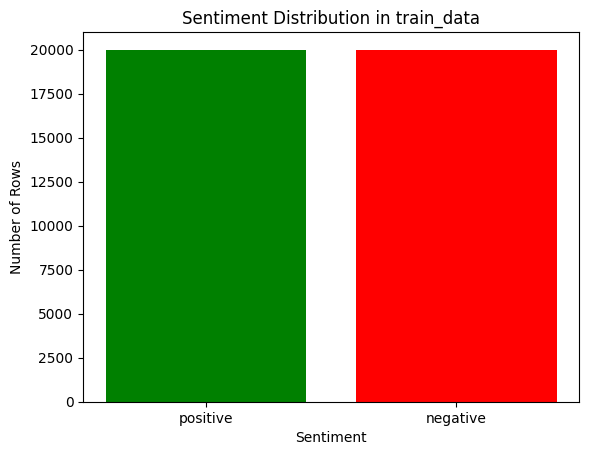

In [ ]:
sentiment_counts = train_data['sentiment'].value_counts()

# Create a bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Rows')
plt.title('Sentiment Distribution in train_data')
plt.show()

# Data preprocessing

## Theory methods



*   Removing URL
*   Removing all irrelevant characters (Numbers and Punctuation)
*   Convert all characters into lowercase
*   Removing Stopwords
*   Stemming and Lemmatization !!!
*   Remove the words having length <= 2 !!!
*   Remove most frequently used words in both positive and negative reviews
*   Remove whitespaces
*   Removal of Rare words
*   Conversion of Emoji to Words ???
*   Conversion of Emoticon to Words ???
*   Removal of HTML Tags
*   Chat Words Conversion ???
*   Spelling Correction ??? 10 rows evaluates for 1.2 minutes








Мб сначала токенизировать, а потом уже работать с текстом







## Methods

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antongerasimov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords

In [20]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [21]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antongerasimov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
def preprocess_data(column):
  column = remove_url(column)
  column = remove_html_tags(column)
  column = remove_non_alphanumeric(column)
  column = convert_to_lowercase(column)
  column = remove_short_words(column)
  column = remove_stopwords(column)
  return column

In [23]:
def remove_url(review_text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(url_pattern, '', review_text)

In [24]:
def remove_html_tags(review_text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', review_text)

In [25]:
def remove_non_alphanumeric(review_text):
  return re.sub(r'[^a-zA-Z]', ' ', review_text)

In [26]:
def convert_to_lowercase(review_text):
  review_text = review_text.lower()
  return review_text

In [27]:
def remove_short_words(review_text, min_length=3):
    return ' '.join(word for word in review_text.split() if len(word) > min_length)

In [28]:
def remove_stopwords(review_text):
    STOPWORDS = set(stopwords.words('english'))
    words = review_text.split()
    filtered_words = [word for word in words if word.lower() not in STOPWORDS]
    return ' '.join(filtered_words)

In [29]:
def correct_spellings(text):
    spell = SpellChecker()
    corrected_text = []
    for word in text.split():
        corrected_word = spell.correction(word)
        if corrected_word:
            corrected_text.append(corrected_word)
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [30]:
def find_common_words(data):
  positive_review = data[data.sentiment == 'positive']['review']
  negative_review = data[data.sentiment == 'negative']['review']
  splited_review = [positive_review, negative_review]
  all_text_sets = [' '.join(examples) for examples in splited_review]

  top_words_sets = []

  for item, text_set in enumerate(all_text_sets):
    top_words_series = pd.Series(text_set.split()).value_counts().head(13)
    top_words = top_words_series.index.tolist()
    top_word_counts = top_words_series.values.tolist()
    top_words_sets.append(set(top_words))

  return set.intersection(*top_words_sets)

In [31]:
def remove_common_words_from_review(review_text, common_words):
    words = review_text.split()
    filtered_words = [word for word in words if word.lower() not in common_words]  # Consider case-insensitive matching
    return ' '.join(filtered_words)

Скорее всего нужно удалять одни и те же слова, и брать их из трейн даты

In [84]:
def remove_common_words(current_data, common_words):
    current_data['review'] = current_data['review'].apply(lambda text: remove_common_words_from_review(text, common_words))
    return current_data

In [85]:
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [86]:
def all_data_prep(data, common_words):
  data['review'] = data['review'].apply(preprocess_data)
  data = remove_common_words(data, common_words)
  data['review'] = data['review'].apply(lambda text: lemmatize_words(text))
  return data

# Lematization vs Stematization

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Data preparation

In [ ]:
data_for_test = train_data.copy()
data_for_test['review'] = data_for_test['review'].apply(preprocess_data)

stemmer

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data_for_test['stemmed_review'] = data_for_test['review'].apply(lambda text: stem_words(text))

,review,sentiment,stemmed_review
0,caught little totally accident back revival th...,positive,caught littl total accid back reviv theatr sil...
1,believe movie accomplish favor friends early a...,negative,believ movi accomplish favor friend earli apri...
2,spoiler alert gets nerve people remake term lo...,negative,spoiler alert get nerv peopl remak term loos g...
3,thing learnt watching george romero creepshow ...,negative,thing learnt watch georg romero creepshow stum...
4,remember theaters reviews said horrible well t...,negative,rememb theater review said horribl well think ...


In [ ]:
data_for_test['stemmed_review'].head()

0    caught littl total accid back reviv theatr sil...
1    believ movi accomplish favor friend earli apri...
2    spoiler alert get nerv peopl remak term loos g...
3    thing learnt watch georg romero creepshow stum...
4    rememb theater review said horribl well think ...
Name: stemmed_review, dtype: object

lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
data_for_test['lemmed_review'] = data_for_test['review'].apply(lambda text: lemmatize_words(text))
data_for_test['lemmed_review'].head()

0    caught little totally accident back revival th...
1    believe movie accomplish favor friend early ap...
2    spoiler alert get nerve people remake term loo...
3    thing learnt watching george romero creepshow ...
4    remember theater review said horrible well thi...
Name: lemmed_review, dtype: object

# Saving common words from train_data

In [ ]:
data_for_common_words = train_data.copy()
data_for_common_words['review'] = data_for_common_words['review'].apply(preprocess_data)

In [ ]:
common_words = find_common_words(data_for_common_words)

In [ ]:
common_words

{'even',
 'film',
 'good',
 'like',
 'movie',
 'much',
 'really',
 'story',
 'time',
 'would'}

In [ ]:
file_path = "/content/common_words.txt"

# Save common_words to the file
with open(file_path, 'w') as file:
    for word in common_words:
        file.write(word + '\n')

# Verify that the file has been created
!ls /content

common_words.txt  gdrive  sample_data


# Data preprocessing with tokenization

## Data preprocessing with tokenization

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antongerasimov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [34]:
def preprocess_data(data, common_words):
  data['review'] = data['review'].apply(remove_url)
  data['review'] = data['review'].apply(remove_html_tags)
  data['review'] = data['review'].apply(remove_non_alphanumeric)
  data['review'] = data['review'].apply(convert_to_lowercase)
  data['tokens'] = data['review'].apply(tokenization)
  data['tokens'] = data['tokens'].apply(remove_short_words)
  data['tokens'] = data['tokens'].apply(remove_stopwords)
  data['tokens'] = data['tokens'].apply(lambda tokens: remove_common_words_from_tokens(tokens, common_words))
  data['tokens'] = data['tokens'].apply(lemmatize_tokens)
  return data

In [35]:
def tokenization(review_text):
  return word_tokenize(review_text)

In [36]:
def remove_short_words(tokens, min_length=3):
    result = [word for word in tokens if len(word) > min_length]
    return result

In [37]:
def remove_stopwords(tokens):
    STOPWORDS = set(stopwords.words('english'))
    result = [i for i in tokens if not i in STOPWORDS]
    return result

In [38]:
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

In [39]:
def remove_common_words_from_tokens(tokens, common_words):
    return [token for token in tokens if token.lower() not in common_words]

# Vectorization comparison

## Data preprocessing

In [40]:
common_words_path = main_dir / 'data' / 'processed'
common_words_file_name = "common_words.txt"

In [41]:
common_words_file_path = os.path.join(common_words_path, common_words_file_name)

# Read the content of the file
with open(common_words_file_path, 'r') as file:
    common_words_content = file.read()

# Split the content into a set of words
common_words = set(word for word in common_words_content.split('\n') if word)

In [42]:
train_data_tokens = preprocess_data(train_data, common_words)

In [43]:
test_data_tokens = preprocess_data(test_data, common_words)

In [44]:
train_data_tokens.head()

,review,sentiment,tokens
0,i caught this little gem totally by accident b...,positive,"[caught, little, totally, accident, back, revi..."
1,i can t believe that i let myself into this mo...,negative,"[believe, accomplish, favor, friend, early, ap..."
2,spoiler alert it just gets to me the nerve ...,negative,"[spoiler, alert, get, nerve, people, remake, t..."
3,if there s one thing i ve learnt from watching...,negative,"[thing, learnt, watching, george, romero, cree..."
4,i remember when this was in theaters reviews ...,negative,"[remember, theater, review, said, horrible, we..."


In [45]:
X_train = train_data_tokens['review']
X_test = test_data_tokens['review']
y_train = train_data_tokens['sentiment']
y_test = test_data_tokens['sentiment']

## Vectors initialization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [47]:
bow_vec = CountVectorizer()
X_train_bow = bow_vec.fit_transform(X_train)
X_test_bow = bow_vec.transform(X_test)

In [48]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(40000, 91896)
(10000, 91896)


In [49]:
tfidf_vec = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

In [50]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(40000, 2500)
(10000, 2500)


As we can see, with TF-IDF we can make vectors with much less dimensions

## Log reg

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [52]:
model_lg_tfidf = LogisticRegression()
model_lg_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [53]:
model_lg_tf_idf_acc = cross_val_score(estimator=model_lg_tfidf, X=X_train_tfidf, y=y_train, cv=5, n_jobs=-1)
model_lg_tf_idf_acc

array([0.884375, 0.878   , 0.885   , 0.877625, 0.882375])

In [54]:
tfidf_prediction = model_lg_tfidf.predict(X_test_tfidf)

In [58]:
model_lg_bow = LogisticRegression(max_iter=100000)
model_lg_bow.fit(X_train_bow, y_train)

LogisticRegression(max_iter=100000)

In [59]:
model_lg_bow_acc = cross_val_score(estimator=model_lg_bow, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
model_lg_bow_acc

array([0.886375, 0.882125, 0.8865  , 0.88475 , 0.8845  ])

In [60]:
bow_prediction = model_lg_bow.predict(X_test_bow)

## Results

In [61]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [62]:
def calc_metrics(model, vectors):
  prediction = model.predict(vectors)
  accuracy = accuracy_score(y_test, prediction)
  pos_label = 'negative'

  recall = recall_score(y_test, prediction, pos_label=pos_label)
  f1 = f1_score(y_test, prediction, pos_label=pos_label)
  print(f"Recall: {round(recall*100,1)}%")
  print(f"F1-score: {round(f1*100, 1)}%")
  print(f"Accuracy: {round(accuracy*100, 1)}%")


In [63]:
calc_metrics(model_lg_bow, X_test_bow)

Recall: 89.2%
F1-score: 89.3%
Accuracy: 89.4%


In [64]:
calc_metrics(model_lg_tfidf, X_test_tfidf)

Recall: 88.0%
F1-score: 88.5%
Accuracy: 88.6%


# Evaluation with tokens

## Data preprocessing

In [ ]:
data_path = "/content/gdrive/MyDrive/DataScience/final_project"
common_words_file_name = "common_words.txt"

In [ ]:
common_words_file_path = os.path.join(data_path, common_words_file_name)

# Read the content of the file
with open(common_words_file_path, 'r') as file:
    common_words_content = file.read()

# Split the content into a set of words
common_words = set(word for word in common_words_content.split('\n') if word)

In [ ]:
train_data_tokens = preprocess_data(train_data, common_words)

KeyboardInterrupt: 

In [ ]:
test_data_tokens = preprocess_data(test_data, common_words)

In [ ]:
train_data_tokens.head()

## Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def identity_tokenizer(text):
    return text

In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, max_features=2500, min_df=0.7, max_df=0.8, lowercase=False)

In [ ]:
tfidf_matrix_train = tfidf_vectorizer.fit_transform(train_data_tokens['tokens'])
X_train_tfidf_vector =  tfidf_matrix_train.toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
tfidf_matrix_test = tfidf_vectorizer.transform(test_data_tokens['tokens'])
X_test_tfidf_vector = tfidf_matrix_test.toarray()

In [ ]:
# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(X_train_tfidf_vector, columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

   abandoned  ability  able  absolute  absolutely  absurd  abuse  academy  \
0        0.0      0.0   0.0       0.0    0.000000     0.0    0.0      0.0   
1        0.0      0.0   0.0       0.0    0.000000     0.0    0.0      0.0   
2        0.0      0.0   0.0       0.0    0.000000     0.0    0.0      0.0   
3        0.0      0.0   0.0       0.0    0.065602     0.0    0.0      0.0   
4        0.0      0.0   0.0       0.0    0.000000     0.0    0.0      0.0   

   accent  accept  ...  wrote  wwii  yeah  year  york  young  younger  youth  \
0     0.0     0.0  ...    0.0   0.0   0.0   0.0   0.0    0.0      0.0    0.0   
1     0.0     0.0  ...    0.0   0.0   0.0   0.0   0.0    0.0      0.0    0.0   
2     0.0     0.0  ...    0.0   0.0   0.0   0.0   0.0    0.0      0.0    0.0   
3     0.0     0.0  ...    0.0   0.0   0.0   0.0   0.0    0.0      0.0    0.0   
4     0.0     0.0  ...    0.0   0.0   0.0   0.0   0.0    0.0      0.0    0.0   

   zero  zombie  
0   0.0     0.0  
1   0.0     0.0  
2 

In [ ]:
#tfidf_vectorizer2 = TfidfVectorizer(tokenizer=identity_tokenizer, max_features=2500, min_df=7, max_df=0.8, lowercase=False)

# Fit and transform the data directly
#tfidf_matrix2 = tfidf_vectorizer2.fit_transform(test_data_tokens['tokens'])

#X_test = tfidf_matrix2.toarray()

In [ ]:
y_train = train_data['sentiment']
y_test = test_data['sentiment']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lg_tf_idf = LogisticRegression()
model_lg_tf_idf.fit(X_train_tfidf_vector, y_train)

NameError: name 'X_train_tfidf_vector' is not defined

In [ ]:
model_lg_tf_idf_acc = cross_val_score(estimator=model_lg_tf_idf, X=X_train_tfidf_vector, y=y_train, cv=5, n_jobs=-1)
model_lg_tf_idf_acc

array([0.88075 , 0.875625, 0.87625 , 0.868625, 0.87525 ])

Logistic regression seems to be one of the fastest algorithm, and I will make my calculations based on this model

Let's find max_features, that will be quite small, but will allow us to make good predictions

### max_features tuning

In [ ]:
model_lr = LogisticRegression()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)

In [ ]:
# Define the values of max_features to try
max_features_values = [100, 500, 1000, 1500, 2000, 2500]

# Dictionary to store results
results = {}

# Loop over max_features values and compute cross-validation scores
for max_features in max_features_values:
    tfidf_vectorizer.set_params(max_features=max_features)
    X_train_tfidf_vector =  tfidf_vectorizer.fit_transform(train_data_tokens['tokens']).toarray()
    tfidf_matrix_test = tfidf_vectorizer.transform(test_data_tokens['tokens'])
    X_test_tfidf_vector = tfidf_matrix_test.toarray()
    model = LogisticRegression()
    model.fit(X_train_tfidf_vector, y_train)
    scores = cross_val_score(model, X_train_tfidf_vector, y_train, cv=5, n_jobs=-1)
    results[max_features] = scores.mean()

# Print the results
for max_features, mean_score in results.items():
    print(f"Max Features: {max_features}, Mean Cross-Validation Score: {mean_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extr

Max Features: 100, Mean Cross-Validation Score: 0.7201000000000001
Max Features: 500, Mean Cross-Validation Score: 0.8325750000000001
Max Features: 1000, Mean Cross-Validation Score: 0.8565249999999999
Max Features: 1500, Mean Cross-Validation Score: 0.8665749999999999
Max Features: 2000, Mean Cross-Validation Score: 0.8717749999999999
Max Features: 2500, Mean Cross-Validation Score: 0.8753


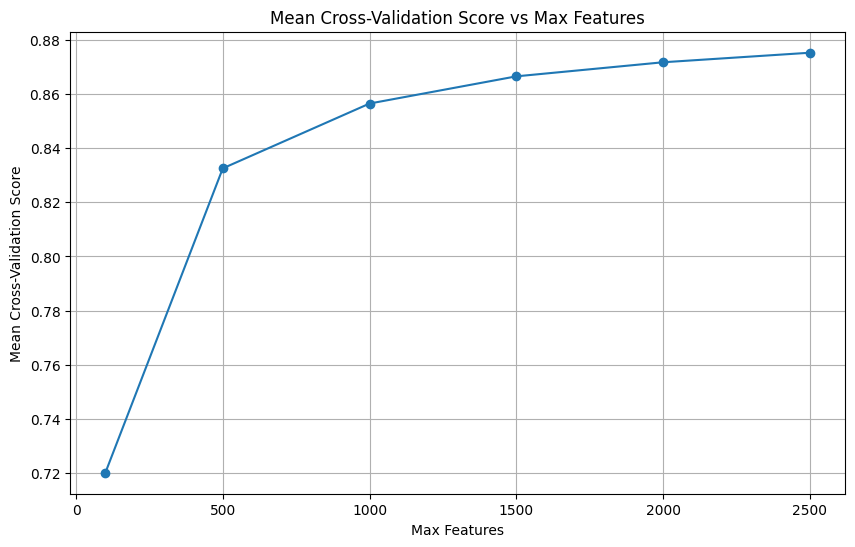

In [ ]:
import matplotlib.pyplot as plt

# Extract max_features and mean_scores for plotting
max_features_values = list(results.keys())
mean_scores = list(results.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, mean_scores, marker='o')
plt.title('Mean Cross-Validation Score vs Max Features')
plt.xlabel('Max Features')
plt.ylabel('Mean Cross-Validation Score')
plt.grid(True)
plt.show()

I will use max_features = 2500

# Different models evaluation

In [65]:
from sklearn.model_selection import cross_val_score

## Preparing vectors

In [ ]:
# X_train_tfidf_vecto
# X_train_bow_vecto

## Decision tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

### Bag of words

In [67]:
model_dt_bow = DecisionTreeClassifier(max_depth=20, random_state=0)
model_dt_bow.fit(X_train_bow, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [68]:
model_dt_bow_acc = cross_val_score(estimator=model_dt_bow, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
model_dt_bow_acc

array([0.73975 , 0.737375, 0.736125, 0.72975 , 0.730625])

In [69]:
calc_metrics(model_dt_bow, X_test_bow)

Recall: 66.0%
F1-score: 72.1%
Accuracy: 74.4%


### TF-IDF

In [70]:
model_dt_tf_idf = DecisionTreeClassifier(max_depth=20, random_state=0)
model_dt_tf_idf.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [71]:
model_dt_tf_idf_acc = cross_val_score(estimator=model_dt_tf_idf, X=X_train_tfidf, y=y_train, cv=5, n_jobs=-1)
model_dt_tf_idf_acc

array([0.737625, 0.740375, 0.74275 , 0.73175 , 0.73175 ])

In [72]:
calc_metrics(model_dt_tf_idf, X_test_tfidf)

Recall: 64.8%
F1-score: 71.5%
Accuracy: 74.2%


## SVM

In [ ]:
from sklearn import svm

### Bag of words

In [ ]:
model_svm_bow = svm.SVC(C=8.0, kernel='linear')
model_svm_bow.fit(X_train_bow, y_train)

SVC(C=8.0, kernel='linear')

This model fits for 54 minutes

In [ ]:
model_svm_bow_acc = cross_val_score(estimator=model_svm_bow, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
model_svm_bow_acc

array([0.869375, 0.86175 , 0.865875, 0.86    , 0.86375 ])

In [ ]:
model_svm_bow.predict(X_test_bow[:10])
#print(model_svm.score(test_text_bow, test_label))

### TF-IDF

In [ ]:
model_svm = svm.SVC(C=8.0, kernel='linear')
model_svm.fit(X_train_tf_idf, y_train)

In [ ]:
model_svm_tf_idf_acc = cross_val_score(estimator=model_svm, X=X_train_tf_idf, y=y_train, cv=5, n_jobs=-1)
model_svm_tf_idf_acc

## Naive bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

### Bag of words

In [ ]:
model_gnb_bow = GaussianNB()
model_gnb_bow.fit(X_train_bow.toarray(), y_train)

In [ ]:
model_gnb_bow_acc = cross_val_score(estimator=model_gnb_bow, X=X_train_bow.toarray(), y=y_train, cv=5, n_jobs=-1)
model_gnb_bow_acc

In [ ]:
calc_metrics(model_gnb_bow, X_test_bow)

### TF-IDF

In [ ]:
model_gnb_tf_idf = GaussianNB()
model_gnb_tf_idf.fit(X_train_tf_idf, y_train)

In [ ]:
model_gnb_tf_idf_acc = cross_val_score(estimator=model_gnb_tf_idf, X=X_train_tf_idf.toarray(), y=y_train, cv=5, n_jobs=-1)
model_gnb_tf_idf_acc

In [ ]:
calc_metrics(model_gnb_tf_idf, X_test_tfidf)

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

### Bag of words

In [ ]:
model_lg_bow = LogisticRegression()
model_lg_bow.fit(X_train_bow, y_train)

LogisticRegression()

In [ ]:
model_lg_bow_acc = cross_val_score(estimator=model_lg_bow, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
model_lg_bow_acc

array([0.893875, 0.889125, 0.888625, 0.88325 , 0.887125])

In [ ]:
calc_metrics(model_lg_bow, X_test_bow)

array(['positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

### TF-IDF

In [ ]:
model_lg_tf_idf = LogisticRegression()
model_lg_tf_idf.fit(X_train_tf_idf, y_train)

LogisticRegression()

In [ ]:
model_lg_tf_idf_acc = cross_val_score(estimator=model_lg_tf_idf, X=X_train_tf_idf, y=y_train, cv=5, n_jobs=-1)
model_lg_tf_idf_acc

array([0.88075, 0.8755 , 0.87575, 0.8695 , 0.874  ])

In [ ]:
calc_metrics(model_lg_tf_idf, X_test_tfidf)

array(['negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

# Models tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

## SVM

In [ ]:


parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=10, n_jobs=-1) ## `-1` run in parallel
clf.fit(X_train_bow, y_train)

In [ ]:
#print(sorted(clf.cv_results_.keys()))
print(clf.best_params_)

In [ ]:
print(clf.score(X_test_bow, y_test))

## Logistic regression

In [ ]:
grid={"C":np.logspace(-3, 3, 7), "penalty":["l1","l2"]}

In [ ]:
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=4)
logreg_cv.fit(X_train_tf_idf,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.874475


In [ ]:
logreg2=LogisticRegression()
logreg2_cv=GridSearchCV(logreg2,grid,cv=4)
logreg2_cv.fit(X_train_bow,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg2_cv.best_params_)
print("accuracy :",logreg2_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.888025


# Training

In [ ]:
data_path = "/content/gdrive/MyDrive/DataScience/final_project"
common_words_file_name = "common_words.txt"

In [ ]:
common_words_file_path = os.path.join(data_path, common_words_file_name)

# Read the content of the file
with open(common_words_file_path, 'r') as file:
    common_words_content = file.read()

# Split the content into a set of words
common_words = set(word for word in common_words_content.split('\n') if word)

In [ ]:
common_words

{'even', 'film', 'good', 'like', 'movie', 'really', 'story', 'time', 'would'}

In [ ]:
train_data = pd.read_csv(os.path.join(data_path, train_file_name))
train_data.shape

(40000, 2)

In [ ]:
test_data = pd.read_csv(os.path.join(data_path, test_file_name))
test_data.shape

(10000, 2)

In [ ]:
train_data = all_data_prep(train_data, common_words)

In [ ]:
test_data = all_data_prep(test_data, common_words)

In [ ]:
X_train = train_data['review']
y_train = train_data['sentiment']
X_test = test_data['review']
y_test = test_data['sentiment']

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(40000,) (40000,) (10000,) (10000,)


In [ ]:
X_train.head()

0    caught little totally accident back revival th...
1    believe accomplish favor friend early april ce...
2    spoiler alert get nerve people remake term loo...
3    thing learnt watching george romero creepshow ...
4    remember theater review said horrible well thi...
Name: review, dtype: object

# Evaluating pipeline

## asdf

In [ ]:
data['lemmed_review'] = data['review'].apply(lambda text: lemmatize_words(text))
data.head()

,review,sentiment,stemmed_review,lemmed_review
0,caught little totally accident back revival th...,positive,caught littl total accid back reviv theatr sil...,caught little totally accident back revival th...
1,believe accomplish favor friends early april c...,negative,believ accomplish favor friend earli april cer...,believe accomplish favor friend early april ce...
2,spoiler alert gets nerve people remake term lo...,negative,spoiler alert get nerv peopl remak term loos m...,spoiler alert get nerve people remake term loo...
3,thing learnt watching george romero creepshow ...,negative,thing learnt watch georg romero creepshow stum...,thing learnt watching george romero creepshow ...
4,remember theaters reviews said horrible well t...,negative,rememb theater review said horribl well think ...,remember theater review said horrible well thi...


In [ ]:
train_data = pd.read_csv(os.path.join(data_path, file_name))
train_data.shape

(10000, 2)

In [ ]:
data_path = "/content/gdrive/MyDrive/DataScience/final_project"
file_name = "test.csv"

In [ ]:
test_data = pd.read_csv(os.path.join(data_path, file_name))
test_data.shape

(10000, 2)

In [ ]:
train_data['review'][1874]

'I am not so much like Love Sick as I image. Finally the film express sexual relationship of Alex, kik, Sandu their triangle love were full of intenseness, frustration and jealous, at last, Alex waked up and realized that they would not have result and future.Ending up was sad.<br /><br />The director Tudor Giurgiu was in AMC theatre on Sunday 12:00PM on 08/10/06, with us watched the movie together. After the movie he told the audiences that the purposed to create this film which was to express the sexual relationships of Romanian were kind of complicate.<br /><br />On my point of view sexual life is always complicated in everywhere, I don\'t feel any particular impression and effect from the movie. The love proceeding of Alex and Kiki, and Kiki and her brother Sandu were kind of next door neighborhood story.<br /><br />The two main reasons I don\'t like this movie are, firstly, the film didn\'t told us how they started to fall in love? Sounds like after Alex moved into the building wh

In [ ]:
data = train_data

In [ ]:
data.head()

,review,sentiment
0,"Yes, MTV there really is a way to market Daria...",negative
1,The story of the bride fair is an amusing and ...,negative
2,"A team varied between Scully and Mulder, two o...",positive
3,This was a popular movie probably because of t...,negative
4,This movie made me so angry!! Here I am thinki...,negative


In [ ]:
#data['review'].iloc[:10] = data['review'].iloc[:10].apply(correct_spellings)

In [ ]:
#data['review'] = data['review'].apply(correct_spellings)

In [ ]:
data['review'] = data['review'].apply(preprocess_data)

In [ ]:
find_common_words(data)

{'even', 'film', 'good', 'like', 'movie', 'really', 'story', 'time', 'would'}

In [ ]:
data['review'][1874]

'tried watching show several different occasions time found utterly pale humor reason mention thing solely based ridiculing anything republicans done short basically democratic party political opinions touted humor stewart wisecrack anything republicans done audience wets gales forced laughter guess left devoid real substance define terms much hate republicans faith'

In [ ]:
data = remove_common_words(data)

In [ ]:
data['review'][1874]

'tried watching show several different occasions found utterly pale humor reason mention thing solely based ridiculing anything republicans done short basically democratic party political opinions touted humor stewart wisecrack anything republicans done audience wets gales forced laughter guess left devoid real substance define terms hate republicans faith'

In [ ]:
data.head(10)

,review,sentiment
0,caught little gem totally accident back reviva...,positive
1,believe let accomplish favor friends ask early...,negative
2,spoiler alert gets nerve people remake use ter...,negative
3,thing learnt watching george romero creepshow ...,negative
4,remember theaters reviews said horrible well t...,negative
5,opera u title terror opera somewhat letdown da...,positive
6,heard long ago finally found ebay five bucks e...,positive
7,john holmes famous infamous three amigos say r...,positive
8,worth mentioning omitted reviews read subtext ...,positive
9,darling lili fantastic far favorite films cert...,positive


In [ ]:
data['review'][2]

'spoiler alert gets nerve people remake use term loosely good movies american version dutch thriller someone decided original ending pasteurized enough american audiences create new one stupid improbable pretend dead come life good guy kick butt kind ending favor get original one'

In [ ]:
from collections import Counter
cnt = Counter()
for text in data['review'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('movie', 70374),
 ('film', 64037),
 ('one', 42953),
 ('like', 31952),
 ('good', 23826),
 ('time', 20097),
 ('even', 19827),
 ('would', 19726),
 ('really', 18544),
 ('see', 18460)]

In [ ]:
positive_review = data[data.sentiment == 'positive']['review']
negative_review = data[data.sentiment == 'negative']['review']

In [ ]:
color = ['blue', 'green']
splited_review = [positive_review, negative_review]

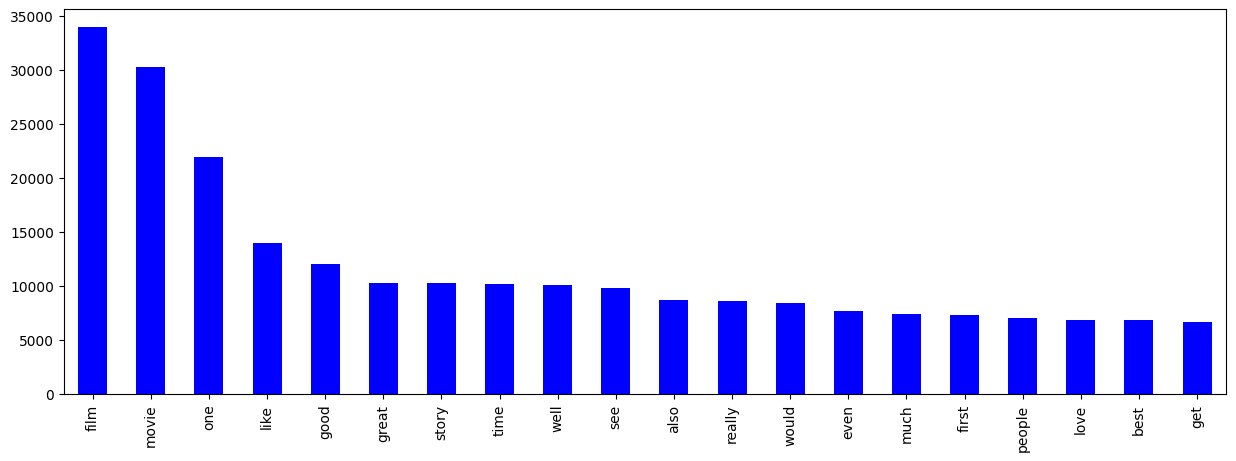

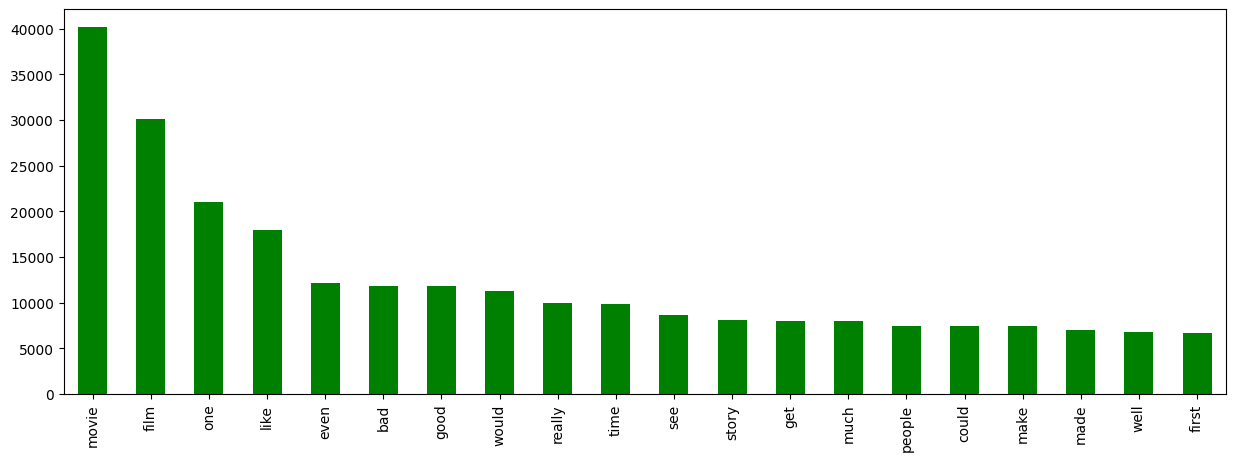

In [ ]:
for item in range(2):
  plt.figure(figsize=(15,5))
  pd.Series(' '.join(splited_review[item]).split()).value_counts().head(20).plot(kind='bar', color=color[item])
  plt.show()

We can see, that 'movie', 'film', 'one', 'like', 'good'

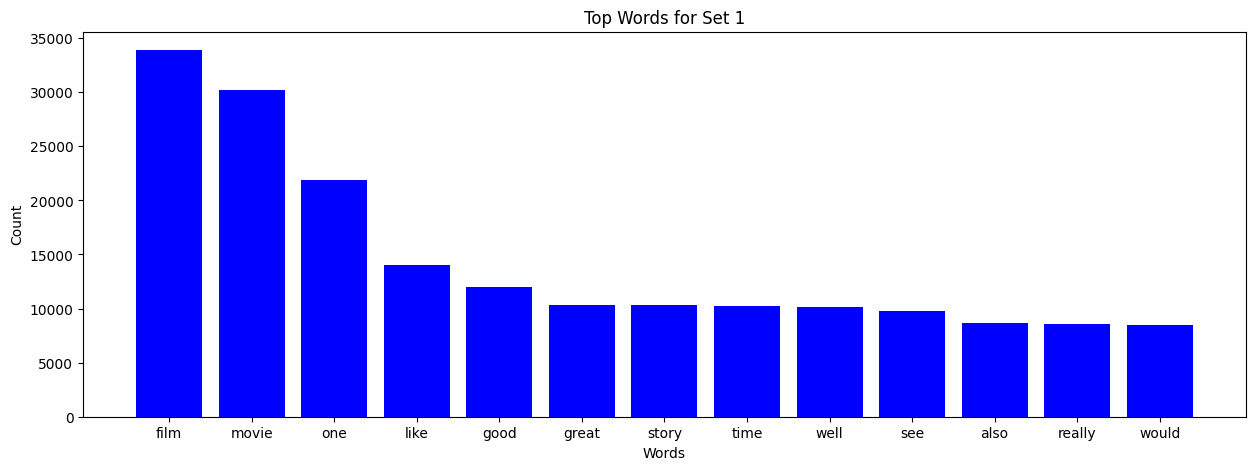

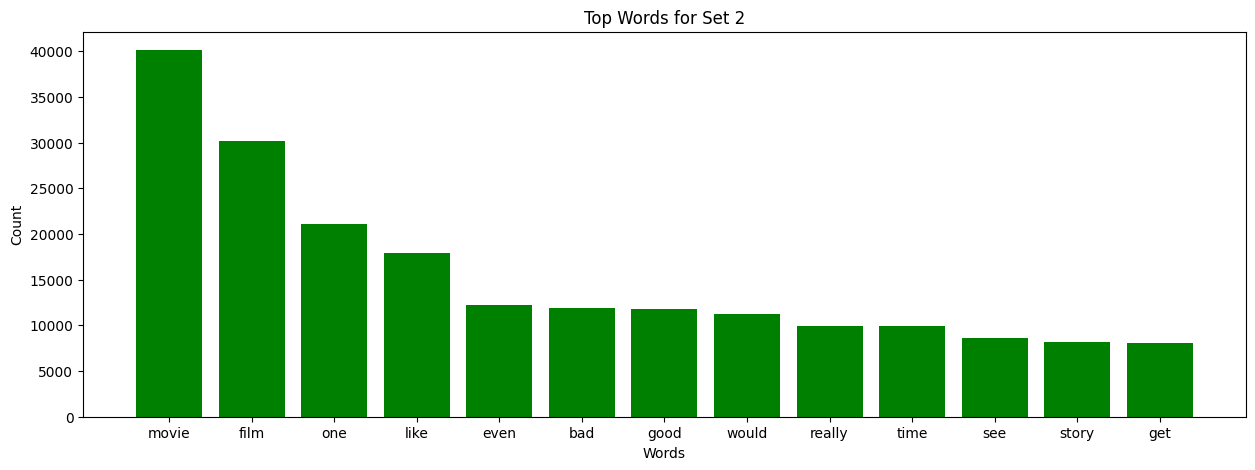

Common Words: {'really', 'time', 'see', 'would', 'movie', 'good', 'story', 'like', 'film', 'one'}


In [ ]:
all_text_sets = [' '.join(examples) for examples in splited_review]

# Find the top words across all examples in each set
top_words_sets = []

for item, text_set in enumerate(all_text_sets):
    plt.figure(figsize=(15,5))
    top_words_series = pd.Series(text_set.split()).value_counts().head(13)
    top_words = top_words_series.index.tolist()
    top_word_counts = top_words_series.values.tolist()

    plt.bar(top_words, top_word_counts, color=color[item])
    plt.title(f'Top Words for Set {item+1}')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()

    top_words_sets.append(set(top_words))

# Find common words
common_words = set.intersection(*top_words_sets)

# Print common words
print("Common Words:", common_words)

In [ ]:
def delete_frequent_common_words(review_text, words):
    words = text.split()
    filtered_words = [word for word in words if word not in words]
    return ' '.join(filtered_words)

In [ ]:
data['review'] = delete_frequent_common_words(data['review'], common_words)

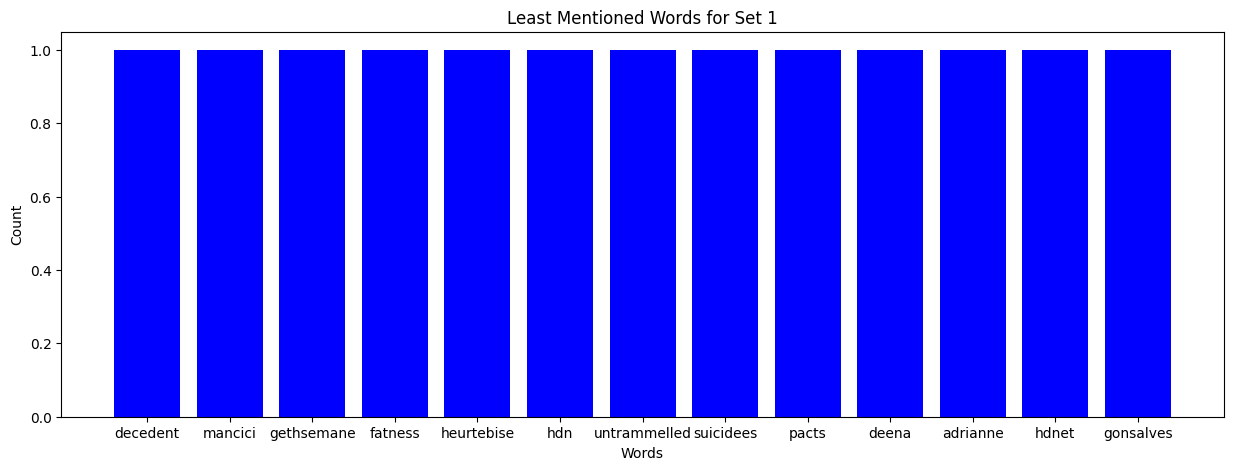

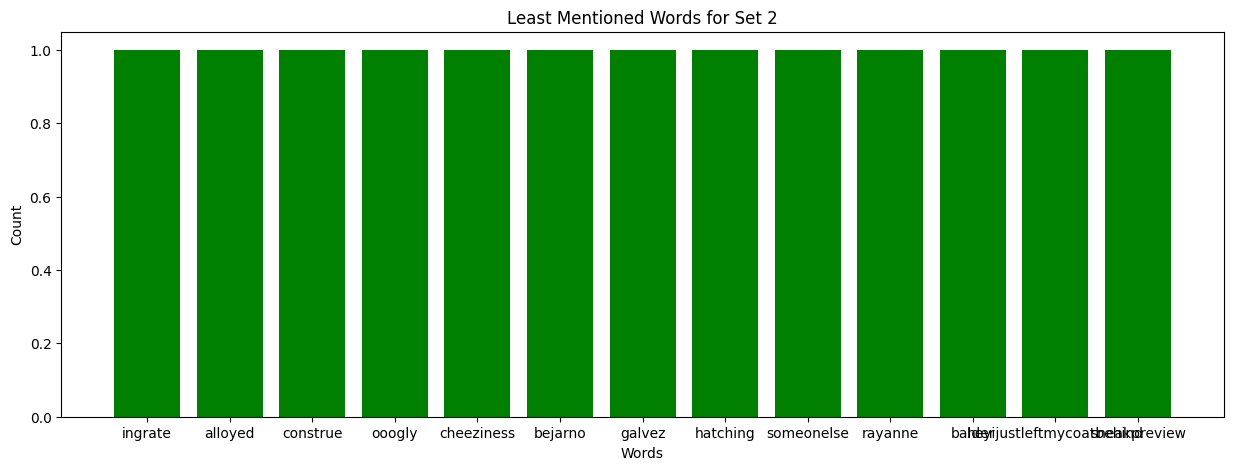

Common Least Mentioned Words: set()


In [ ]:
all_text_sets = [' '.join(examples) for examples in splited_review]

# Find the least mentioned words across all examples in each set
bottom_words_sets = []

for item, text_set in enumerate(all_text_sets):
    plt.figure(figsize=(15,5))
    bottom_words_series = pd.Series(text_set.split()).value_counts().tail(13)
    bottom_words = bottom_words_series.index.tolist()
    bottom_word_counts = bottom_words_series.values.tolist()

    plt.bar(bottom_words, bottom_word_counts, color=color[item])
    plt.title(f'Least Mentioned Words for Set {item+1}')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()

    bottom_words_sets.append(set(bottom_words))

# Find common least mentioned words
common_bottom_words = set.intersection(*bottom_words_sets)

# Print common least mentioned words
print("Common Least Mentioned Words:", common_bottom_words)

word1    1
word2    1
word3    1
wordA    1
dtype: int64


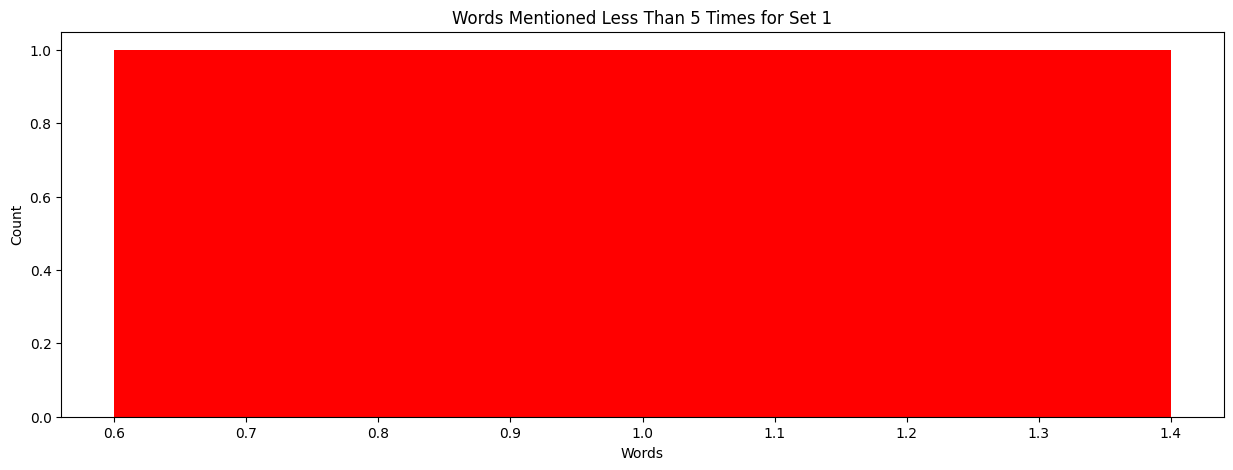

word4    1
word5    1
word6    1
wordA    1
dtype: int64


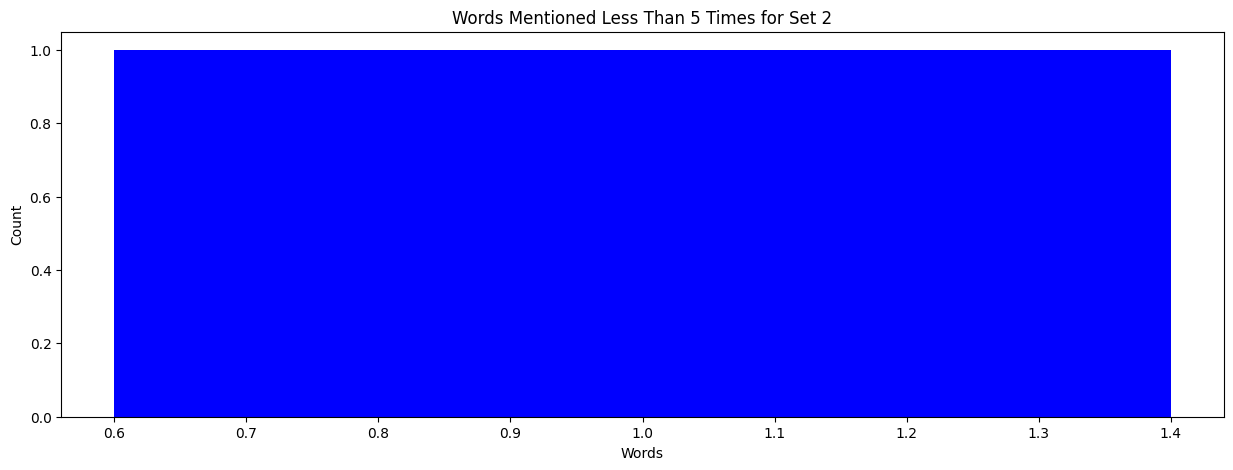

Common Rare Words (Mentioned Less Than 5 Times): {1}


In [ ]:
# Example data
splited_review = [['word1', 'word2', 'word3', 'wordA'], ['word4', 'word5', 'word6', 'wordA']]
color = ['red', 'blue']

# Concatenate all examples in each set
all_text_sets = [' '.join(examples) for examples in splited_review]

# Find words mentioned less than 5 times across all examples in each set
rare_words_sets = []

for item, text_set in enumerate(all_text_sets):
    plt.figure(figsize=(15,5))
    rare_words_series = pd.Series(text_set.split()).value_counts()
    rare_words_series = rare_words_series[rare_words_series < 5]
    print(rare_words_series)
    rare_words = rare_words_series.tolist()
    rare_word_counts = rare_words_series.values.tolist()

    plt.bar(rare_words, rare_word_counts, color=color[item])
    plt.title(f'Words Mentioned Less Than 5 Times for Set {item+1}')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()

    rare_words_sets.append(set(rare_words))

# Find common rare words
common_rare_words = set.intersection(*rare_words_sets)

# Print common rare words
print("Common Rare Words (Mentioned Less Than 5 Times):", common_rare_words)

## Compare

In [ ]:
print(model_svm.score(X_test_bow, y_test))
print(model_dec.score(X_test_bow, y_test))
print(model_gnb.score(X_test_bow.toarray(), y_test))
print(model_lg.score(X_test_bow, y_test))

In [ ]:
# F1
from sklearn.metrics import f1_score

y_pred = model_svm.predict(X_test_bow)

f1_score(y_test, y_pred,
         average=None,
         labels = movie_reviews.categories())

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_svm, X_test_bow, y_test, normalize='all')

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_lg, X_test_bow.toarray(), y_test, normalize='all')